# Queue & Stack

In [33]:
class Queue:
  def __init__(self):
    self.data = []

  def is_empty(self):
    return len(self.data) == 0

  def enqueue(self, value):
    self.data.append(value)

  def dequeue(self):
    return self.data.pop(0)

  def __str__(self):
    return str(self.data)


queue = Queue()
queue.enqueue(10)
queue.enqueue(20)
queue.enqueue(30)

print(queue.dequeue())
print(queue.dequeue())
queue.enqueue(40)
print(queue.dequeue())
print(queue)

10
20
30
[40]


In [34]:
class Stack:
  def __init__(self):
    self.data = []

  def is_empty(self):
    return len(self.data) == 0

  def push(self, value):
    self.data.append(value)

  def pop(self):
    return self.data.pop()

  def __str__(self):
    return str(self.data)


stack = Stack()
stack.push(10)
stack.push(20)
stack.push(30)

print(stack.pop())
print(stack.pop())
stack.push(40)
print(stack.pop())
print(stack)

30
20
40
[10]


# Make undirected adjacency list

To convert a directed adjacency list to an undirected one, we need to ensure that for every directed edge $ u \rightarrow v $, we also include an edge $ v \rightarrow u $.

In [126]:
def get_undirected(adjacency_list):
  # Copy the original adjacency list
  undirected_list = {node: neighbors[:] for node, neighbors in adjacency_list.items()}

  for node in adjacency_list:
    for neighbor in adjacency_list[node]:
      # Add node to neighbor's list if not already present
      if node not in undirected_list[neighbor]:
        undirected_list[neighbor].append(node)

  # Sort neighbors of each node
  for node in undirected_list:
    undirected_list[node].sort()

  return undirected_list


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
get_undirected(adjacency_list)

{0: [1, 2], 1: [0, 3, 4], 2: [0, 3, 4], 3: [1, 2, 4], 4: [1, 2, 3]}

In [127]:
def is_undirected(adjacency_list):
  for node in adjacency_list:
    for neighbor in adjacency_list[node]:
      # Check if the reverse edge exists
      if node not in adjacency_list[neighbor]:
        return False
  return True


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
is_undirected(adjacency_list)

adjacency_list = {0: [1, 2], 1: [0, 3, 4], 2: [0, 4, 3], 3: [1, 2, 4], 4: [1, 2, 3]}
is_undirected(adjacency_list)

False

True

In [128]:
def print_adjacency_list(adjacency_list):
  nodes = sorted(adjacency_list.keys())
  edges = []

  for node, neighbors in adjacency_list.items():
    for neighbor in neighbors:
      edges.append((node, neighbor))

  # Print nodes
  for node in nodes:
    print(node)

  # Print edges
  for edge in edges:
    print(f"{edge[0]} {edge[1]}")


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
print_adjacency_list(adjacency_list)

0
1
2
3
4
0 1
0 2
1 3
1 4
2 4
2 3
3 4


# Demo adjacency lists

## adjacency_list 1

In [38]:
adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}

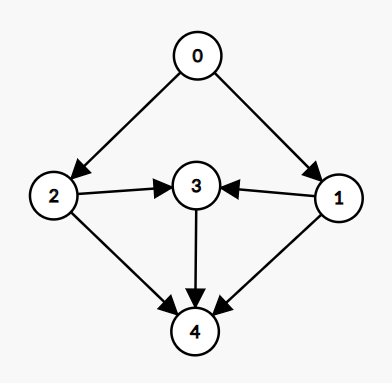

## adjacency_list 1 (undirected variant)

In [39]:
adjacency_list = {0: [1, 2], 1: [0, 3, 4], 2: [0, 3, 4], 3: [1, 2, 4], 4: [1, 2, 3]}

All the arrows are double headed (OMG, undirected graph is a special kind of directed graph): 😱👇

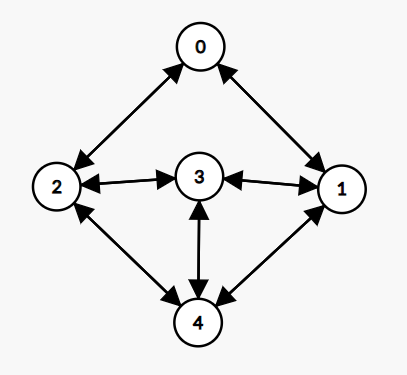

Or simply remove all the arrow heads: 😅👇

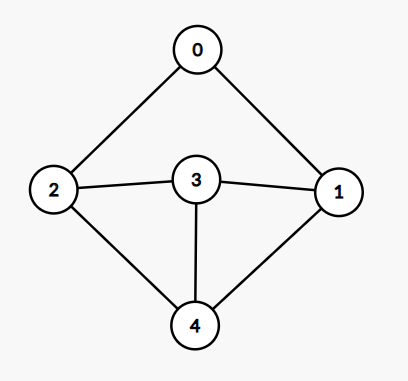

## adjacency_list 2

In [40]:
adjacency_list = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['E', 'F'],
    'D': ['X'],
    'E': ['D', 'M'],
    'F': [],
    'X': [],
    'M': [],
}

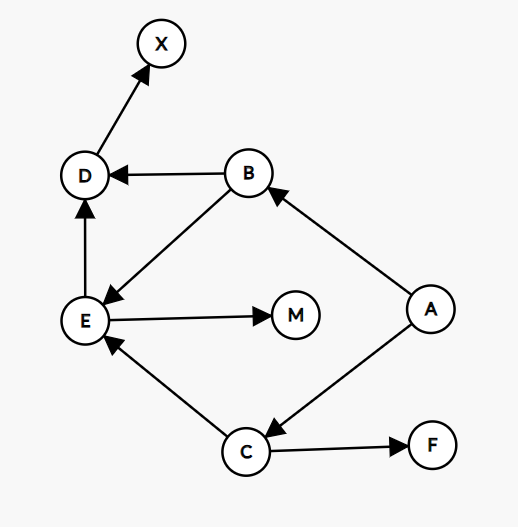

## adjacency_list 3

In [41]:
adjacency_list = {
    1: [2, 3, 7],
    2: [4, 7],
    3: [5, 7],
    4: [6],
    5: [6],
    7: [6],
    6: []
}

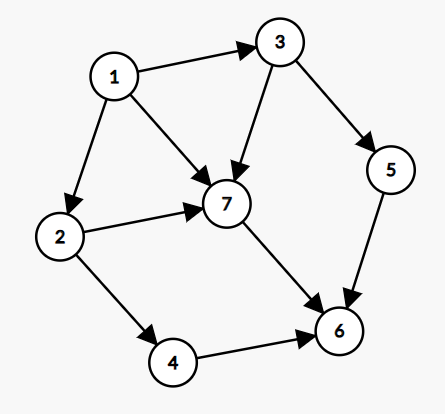

## adjacency_list 4 (2 components)

In [94]:
adjacency_list = {
    'A': ['B'],
    'B': ['C', 'D'],
    'C': ['A'],
    'D': [],
    'E': ['F'],
    'F': [],
}

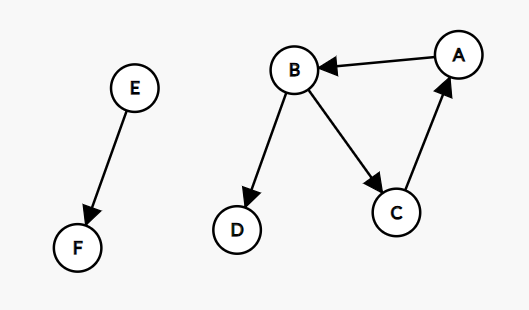

## adjacency_list 5 (2 components)

In [105]:
adjacency_list = {
    0: [1, 2],
    1: [3, 4],
    2: [],
    3: [],
    4: [],
    5: [],
}

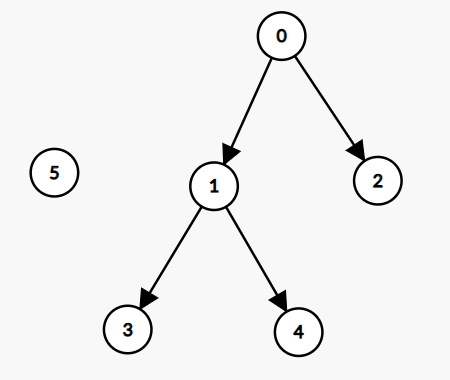

## adjacency_list 6 (3 components)

In [42]:
adjacency_list = {
    'A': ['B', 'C'],
    'B': ['D'],
    'C': ['D'],
    'D': [],
    'E': ['F'],
    'F': ['G'],
    'G': [],
    'H': []
}

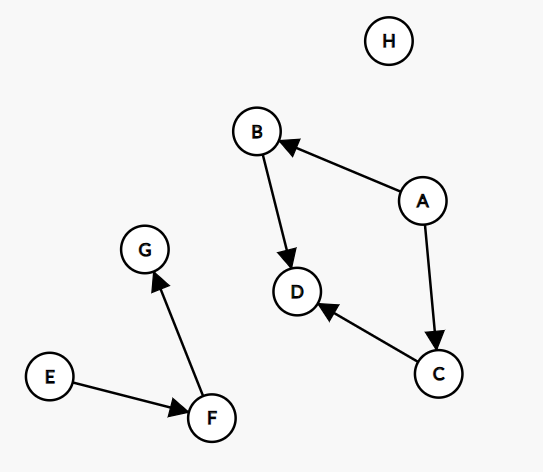

# BFS

In [130]:
def bfs(adjacency_list, start_vertex):
  visited = {vertex: False for vertex in adjacency_list}
  order = []

  queue = Queue()
  queue.enqueue(start_vertex)
  visited[start_vertex] = True

  while not queue.is_empty():
    curr_vertex = queue.dequeue()
    order.append(curr_vertex)

    for adj_vertex in adjacency_list[curr_vertex]:
      if not visited[adj_vertex]:
        queue.enqueue(adj_vertex)
        visited[adj_vertex] = True
  return visited, order


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
bfs(adjacency_list, 0)

({0: True, 1: True, 2: True, 3: True, 4: True}, [0, 1, 2, 3, 4])

# DFS

In [44]:
def dfs(adjacency_list, start_vertex):
  visited = {vertex: False for vertex in adjacency_list}
  order = []

  stack = Stack()
  stack.push(start_vertex)
  visited[start_vertex] = True

  while not stack.is_empty():
    curr_vertex = stack.pop()
    order.append(curr_vertex)

    for adj_vertex in adjacency_list[curr_vertex]:
      if not visited[adj_vertex]:
        stack.push(adj_vertex)
        visited[adj_vertex] = True
  return visited, order


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
dfs(adjacency_list, 0)

({0: True, 1: True, 2: True, 3: True, 4: True}, [0, 2, 3, 4, 1])

# DFS Recursive

In [45]:
def dfs_recursive(adjacency_list, curr_vertex, visited=None, order=None):
  if visited is None:
    visited = {vertex: False for vertex in adjacency_list}
    order = []

  visited[curr_vertex] = True
  order.append(curr_vertex)

  for adj_vertex in adjacency_list[curr_vertex]:
    if not visited[adj_vertex]:
      dfs_recursive(adjacency_list, adj_vertex, visited, order)
  return visited, order


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
dfs_recursive(adjacency_list, 0)

({0: True, 1: True, 2: True, 3: True, 4: True}, [0, 1, 3, 4, 2])

# DFS vs DFS recursive vs BFS

In [47]:
adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
dfs(adjacency_list, 0)
dfs_recursive(adjacency_list, 0)
bfs(adjacency_list, 0)

({0: True, 1: True, 2: True, 3: True, 4: True}, [0, 2, 3, 4, 1])

({0: True, 1: True, 2: True, 3: True, 4: True}, [0, 1, 3, 4, 2])

({0: True, 1: True, 2: True, 3: True, 4: True}, [0, 1, 2, 3, 4])

# Parent, level info (BFS)

In [51]:
def bfs(adjacency_list, start_vertex):
  visited = {vertex: False for vertex in adjacency_list}
  parent = {vertex: -1 for vertex in adjacency_list}  # NEW
  level = {vertex: 0 for vertex in adjacency_list}  # NEW
  order = []

  queue = Queue()
  queue.enqueue(start_vertex)
  visited[start_vertex] = True

  while not queue.is_empty():
    curr_vertex = queue.dequeue()
    order.append(curr_vertex)

    for adj_vertex in adjacency_list[curr_vertex]:
      if not visited[adj_vertex]:
        queue.enqueue(adj_vertex)
        visited[adj_vertex] = True
        parent[adj_vertex] = curr_vertex  # NEW
        level[adj_vertex] = level[curr_vertex]+1  # NEW
  return visited, order, parent, level


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
bfs(adjacency_list, 0)

({0: True, 1: True, 2: True, 3: True, 4: True},
 [0, 1, 2, 3, 4],
 {0: -1, 1: 0, 2: 0, 3: 1, 4: 1},
 {0: 0, 1: 1, 2: 1, 3: 2, 4: 2})

# Parent, level info (DFS recursive)

In [53]:
def dfs_recursive(adjacency_list, curr_vertex, visited=None, order=None, parent=None, level=None):
  if visited is None:
    visited = {vertex: False for vertex in adjacency_list}
    parent = {vertex: -1 for vertex in adjacency_list}  # NEW
    level = {vertex: 0 for vertex in adjacency_list}  # NEW
    order = []

  visited[curr_vertex] = True
  order.append(curr_vertex)

  for adj_vertex in adjacency_list[curr_vertex]:
    if not visited[adj_vertex]:
      parent[adj_vertex] = curr_vertex  # NEW
      level[adj_vertex] = level[curr_vertex]+1  # NEW
      dfs_recursive(adjacency_list, adj_vertex, visited, order, parent, level)
  return visited, order, parent, level


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
dfs_recursive(adjacency_list, 0)

({0: True, 1: True, 2: True, 3: True, 4: True},
 [0, 1, 3, 4, 2],
 {0: -1, 1: 0, 2: 0, 3: 1, 4: 3},
 {0: 0, 1: 1, 2: 1, 3: 2, 4: 3})

# Find Connected Components (BFS)

In [95]:
def bfs(adjacency_list, start_vertex, visited):
  queue = Queue()
  queue.enqueue(start_vertex)
  visited[start_vertex] = True

  component = []

  while not queue.is_empty():
    curr_vertex = queue.dequeue()
    component.append(curr_vertex)
    for adj_vertex in adjacency_list[curr_vertex]:
      if not visited[adj_vertex]:
        queue.enqueue(adj_vertex)
        visited[adj_vertex] = True
  return component


def find_connected_components(adjacency_list):
  visited = {vertex: False for vertex in adjacency_list}
  components = []

  for vertex in adjacency_list:
    if not visited[vertex]:
      component = bfs(adjacency_list, vertex, visited)
      components.append(component)
  return components


adjacency_list = {
    'A': ['B'],
    'B': ['C', 'D'],
    'C': ['A'],
    'D': [],
    'E': ['F'],
    'F': [],
}

find_connected_components(adjacency_list)

[['A', 'B', 'C', 'D'], ['E', 'F']]

# Pre and Post Numbering (DFS)

In [131]:
def dfs(adjacency_list, curr_vertex, visited, pre, post, counter):
  visited[curr_vertex] = True

  pre[curr_vertex] = counter[0]  # dfs visits the `curr_vertex`
  counter[0] += 1

  # dfs visits the neighbors of `curr_vertex`
  for adj_vertex in adjacency_list[curr_vertex]:
    if not visited[adj_vertex]:
      dfs(adjacency_list, adj_vertex, visited, pre, post, counter)

  post[curr_vertex] = counter[0]  # dfs leaves the `curr_vertex`
  counter[0] += 1


def pre_post_numbering(adjacency_list):
  visited = {vertex: False for vertex in adjacency_list}
  pre = {vertex: -1 for vertex in adjacency_list}
  post = {vertex: -1 for vertex in adjacency_list}
  counter = [0]

  for vertex in adjacency_list:
    if not visited[vertex]:
      dfs(adjacency_list, vertex, visited, pre, post, counter)

  return pre, post


adjacency_list = {
    0: [1, 2],
    1: [3, 4],
    2: [],
    3: [],
    4: [],
    5: [],
}

#     0
#    / \
#   1   2   5
#  / \
# 3   4

pre, post = pre_post_numbering(adjacency_list)
for vertex in adjacency_list:
  print(f'{vertex}: ({pre[vertex]}, {post[vertex]})')

0: (0, 9)
1: (1, 6)
2: (7, 8)
3: (2, 3)
4: (4, 5)
5: (10, 11)


# DAG Topological Sort

In [141]:
def dfs(adjacency_list, curr_vertex, visited, stack):
  visited[curr_vertex] = True

  for neighbor in adjacency_list[curr_vertex]:
    if not visited[neighbor]:
      dfs(adjacency_list, neighbor, visited, stack)

  stack.append(curr_vertex)


def topological_sort(adjacency_list):
  visited = {vertex: False for vertex in adjacency_list}
  stack = []

  for vertex in adjacency_list:
    if not visited[vertex]:
      dfs(adjacency_list, vertex, visited, stack)

  # the stack contains the topologically sorted order in reverse
  return stack[::-1]


adjacency_list = {
    0: [1, 2],
    1: [3, 4],
    2: [],
    3: [],
    4: [],
    5: [],
}

#     0
#    / \
#   1   2   5
#  / \
# 3   4

topological_sort(adjacency_list)

[5, 0, 2, 1, 4, 3]

In [145]:
adjacency_list = {
    1: [2, 3, 7],
    2: [4, 7],
    3: [5, 7],
    4: [6],
    5: [6],
    7: [6],
    6: []
}
topological_sort(adjacency_list)

[1, 3, 5, 2, 7, 4, 6]

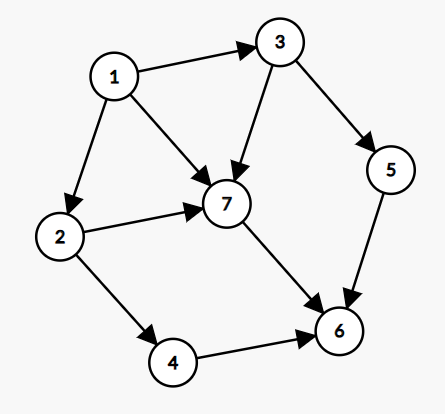

# DAG Longest path

In [148]:
def longest_path(adjacency_list, start_vertex):
  topological_order = topological_sort(adjacency_list)
  longest_paths = {vertex: float('-inf') for vertex in adjacency_list}
  longest_paths[start_vertex] = 0  # start at `start_vertex`

  for vertex in topological_order:
    if longest_paths[vertex] != float('-inf'):  # if vertex is reachable
      for neighbor in adjacency_list[vertex]:
        longest_paths[neighbor] = max(longest_paths[neighbor], longest_paths[vertex] + 1)

  return max(longest_paths.values())


adjacency_list = {
    1: [3, 4],
    2: [],
    3: [],
    4: [],
    5: [],
    0: [1, 2],
}

#     0
#    / \
#   1   2   5
#  / \
# 3   4

longest_path(adjacency_list, 0)

2

In [152]:
adjacency_list = {
    1: [2, 3, 7],
    2: [4, 7],
    3: [5, 7],
    4: [6],
    5: [6],
    7: [6],
    6: []
}
longest_path(adjacency_list, 1)

3

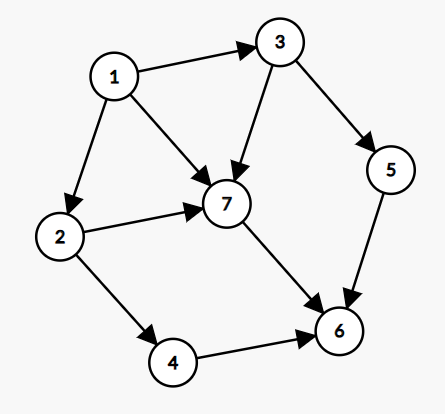